In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.io as si #Used to load the OCTAVE *.mat files

In [2]:
data = si.loadmat('ex3data1.mat')
images,label = data['X'], data['y']  


In [3]:
label[label==10] = 0
# set the zero digit to 0, its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0

C:\Users\Fida Hussain\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


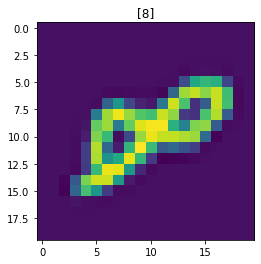

In [4]:
plt.imshow(images[4000].reshape(20,20))
plt.title(label[4000]);

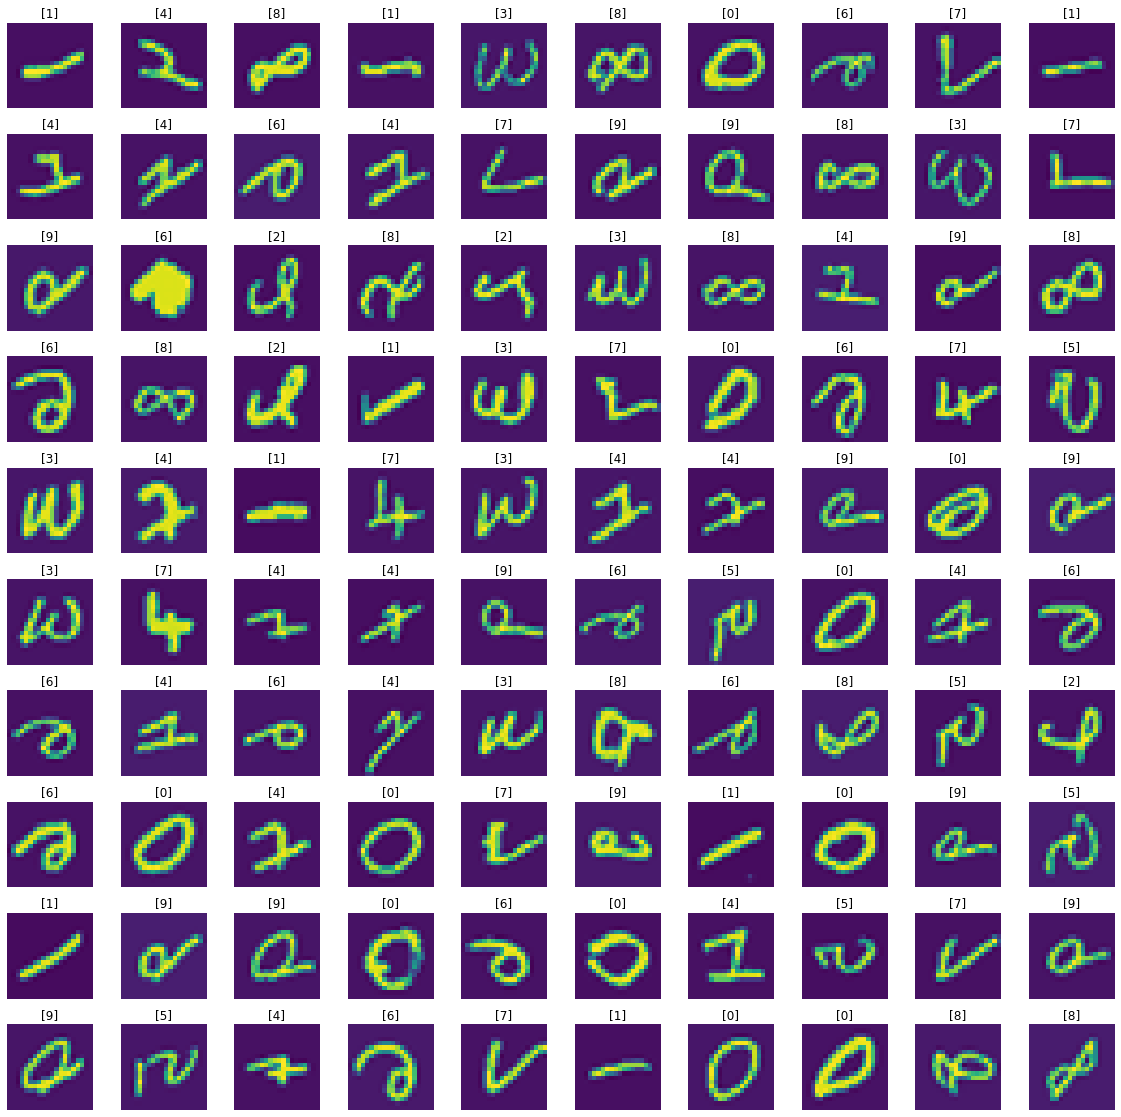

In [5]:
rows = 10
cols=10
fig, axes = plt.subplots(rows,cols, figsize=(20,20))
axes = axes.ravel()
training_data = len(images)
for i in np.arange(0,rows*cols):
    index = np.random.randint(0, training_data)
    axes[i].imshow(images[index].reshape(20,20))
    axes[i].axis('off')
    axes[i].set_title(label[index]);
plt.subplots_adjust(hspace=0.3)

* To test your vectorized logistic regression, we will use custom data as defined in the following cell.

In [6]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

def cost_func(theta, x,y,lam):
    m=x.shape[0]
    z = np.dot(x,theta)
    h = sigmoid(z)
    j = -(1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))
    reg = (lam/(2*m)) * np.dot(theta[1:].T, theta[1:])
    J = j+reg
    return J

def gradient(theta,x,y, lam):
    m=x.shape[0]
    z = np.dot(x,theta)
    h = sigmoid(z)
    diff = h-y
    grad = (1/m) * np.dot(x.T, diff)
    grad[1:] = grad[1:] + (lam/m) * theta[1:]
    return grad

In [9]:
m,n = images.shape

In [10]:
images_ = np.append(np.ones((m,1)),images , axis=1)

In [11]:
theta = np.zeros((n+1,1))

In [12]:
cost_0 = cost_func(theta, images_, label, 1)

In [13]:
print('Cost', cost_0)

Cost [[142.64968976]]


# Evaluating when label is 1 

In [14]:
from scipy.optimize import fmin_tnc

In [15]:
y_=(label==1).astype('float')

In [16]:
y_.shape, images_.shape, theta.shape

((5000, 1), (5000, 401), (401, 1))

In [17]:
res = fmin_tnc(cost_func, theta.flatten(), gradient, args=(images_,y_.flatten(), 1))

In [18]:
temp = res[0]

In [19]:
cost_func(temp, images_,y_,1)

array([0.02696008])

# Predicting on entire dataset

In [21]:
all_theta= np.zeros((10,n+1))

In [22]:
all_theta

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
for i in range(10):
    y_=(label == i).astype(np.float64)
    res = fmin_tnc(cost_func, theta.flatten(), gradient, args=(images_,y_.flatten(), 1))  
    all_theta[i] = res[0]   

In [31]:
all_theta.shape, images_.T.shape

((10, 401), (401, 5000))

In [36]:
print('Accuracy is {}'.format(sum(sigmoid(np.dot(all_theta,images_.T )).T.argmax(axis=1).reshape(-1,1) == label) / m))

Accuracy is [0.9446]
